<a href="https://colab.research.google.com/github/Priti-Anandrao-Shinde/WisdomSprouts_Internship2024/blob/main/Music_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/Data"
os.chdir(Root)

In [4]:
import pandas as pd
import numpy as numpy
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
audio_dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data/genres_original'
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
def features_extractor(file):
    audio,sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [7]:
if 552 in metadata.index:
    metadata.drop(labels=552, axis=0, inplace=True)
    print("Label 552 dropped successfully.")
else:
    print("Label 552 not found in the DataFrame's index.")

Label 552 dropped successfully.


In [8]:
import numpy as np

In [9]:
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  try:
    final_class_labels=row["label"]
    file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
    data=features_extractor(file_name)
    extracted_features.append([data, final_class_labels])
  except Exception as e:
    print(f"Error: {e}")
    continue

553it [04:20,  2.21it/s]<ipython-input-6-ed7575c205ae>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [04:21,  1.50it/s]

Error: 


999it [07:40,  2.17it/s]


In [10]:
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/Data/genres_original'

if os.path.exists(file_path):
    # Your code to work with the file
    print("Yes Exist")
else:
    print(f"The file '{file_path}' does not exist.")

Yes Exist


In [11]:
import librosa
print(librosa.__version__)

0.10.1


In [12]:
pip install --upgrade librosa

In [13]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [14]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: class, dtype: int64

In [15]:
import numpy as np

In [16]:
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
x.shape

(998, 40)

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
y.shape

(998, 10)

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248777e+00, -1.36347139e+00, -7.22123504e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697758e+00, -3.90829611e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346851e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738452e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763985e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930965e+01,  8.29835587e+01,  2.32049274e+00, ...,
         1.40550280e+00,  4.16220456e-01, -3.45980562e-02],
       [-9.63197021e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698299e-01, -1.84749973e+00]], dtype=float32)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [23]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
num_labels=y.shape[1]

In [26]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense (512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout (0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer="adam")

In [29]:
import time
t=time.localtime()
current_time=time.strftime("%H:%M:%S", t)

In [31]:
## Training model

from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import datetime

num_epochs = 100

num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5',
                               verbose=1, save_best_only=True)

start=datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now()-start

print("Training completed in time: ", duration)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.7845
Epoch 1: val_loss improved from inf to 2.03497, saving model to saved_models/audio_classification_07:42:34.hdf5
25/25 [==============================] - 1s 44ms/step - loss: 0.6493 - accuracy: 0.7845 - val_loss: 2.0350 - val_accuracy: 0.5950
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.5990 - accuracy: 0.8195
Epoch 2: val_loss improved from 2.03497 to 1.98329, saving model to saved_models/audio_classification_07:42:34.hdf5
25/25 [==============================] - 1s 34ms/step - loss: 0.5990 - accuracy: 0.8195 - val_loss: 1.9833 - val_accuracy: 0.5700
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 0.6551 - accuracy: 0.7721
Epoch 3: val_loss improved from 1.98329 to 1.97938, saving model to saved_models/audio_classification_07:42:34.hdf5
25/25 [==============================] - 1s 22ms/step - loss: 0.6595 - accuracy: 0.7719 - val_loss: 1.9794 - va

In [32]:
model.evaluate(x_test,y_test, verbose=0)

[2.6191952228546143, 0.6150000095367432]

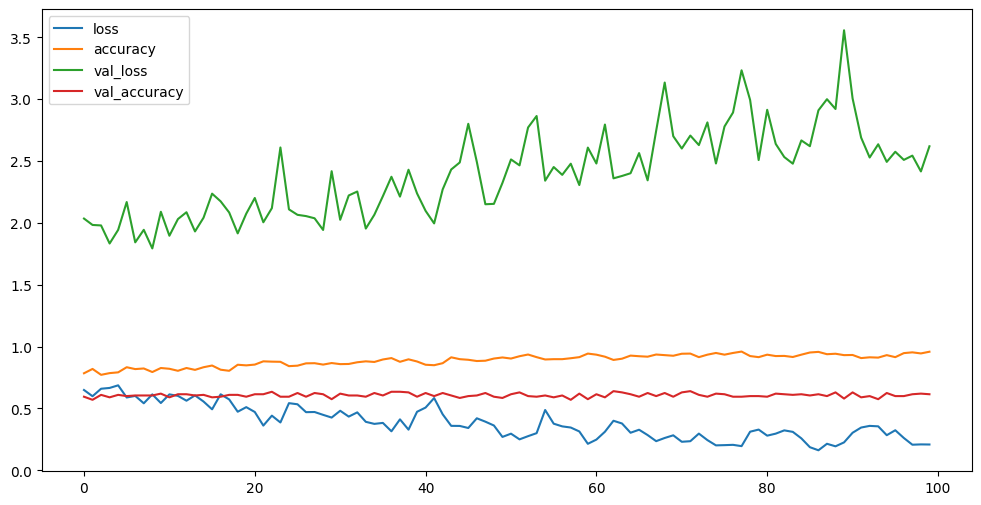

In [33]:
pd.DataFrame(history.history).plot(figsize=(12,6))

plt.show()

In [35]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

7/7 [==============================] - 1s 14ms/step


In [36]:
model.predict(x_test).argmax(axis=1)

7/7 [==============================] - 0s 5ms/step


array([9, 7, 0, 3, 6, 7, 5, 3, 8, 2, 6, 4, 1, 1, 5, 7, 6, 5, 5, 0, 8, 5,
       8, 0, 1, 7, 5, 5, 8, 6, 7, 4, 0, 0, 6, 6, 9, 5, 2, 7, 9, 0, 9, 3,
       0, 8, 4, 3, 5, 6, 5, 8, 6, 5, 0, 2, 9, 2, 3, 6, 3, 8, 9, 9, 7, 9,
       1, 4, 9, 1, 6, 4, 2, 9, 4, 5, 5, 4, 6, 0, 8, 6, 8, 7, 8, 5, 8, 8,
       4, 2, 4, 0, 9, 4, 6, 7, 7, 5, 0, 0, 5, 5, 4, 8, 1, 4, 7, 4, 1, 6,
       0, 4, 8, 4, 6, 2, 4, 6, 3, 5, 4, 8, 2, 9, 0, 7, 1, 2, 0, 7, 8, 9,
       5, 4, 1, 2, 8, 4, 3, 2, 9, 3, 0, 0, 3, 0, 4, 3, 4, 9, 6, 8, 7, 8,
       8, 3, 4, 4, 4, 8, 9, 5, 9, 4, 7, 1, 7, 9, 7, 5, 8, 6, 1, 7, 7, 1,
       4, 7, 2, 7, 0, 3, 6, 4, 8, 8, 0, 6, 9, 7, 9, 6, 1, 2, 8, 9, 6, 2,
       2, 1])

In [39]:
filename="/content/drive/MyDrive/Colab Notebooks/Data/genres_original/classical/classical.00000.wav"
audio, sample_rate=librosa.load(filename, res_type='kaiser_fast')

mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)

print(mfccs_scaled_features.shape)

#predicted_label=model.predict_classes(mfccs_scaled_features)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)

print(predicted_label)

prediction_class=labelencoder.inverse_transform(predicted_label)
print(prediction_class)

[-2.6821857e+02  1.3568166e+02 -3.4056377e+01  2.5616007e+01
 -1.2971723e+01  1.7903263e+01 -9.9908600e+00  5.6340880e+00
 -1.4143673e+01  7.4931846e+00 -3.9764395e+00  8.2583084e+00
 -1.3336012e+00 -3.5799515e-01  1.0361007e+00  3.7968221e+00
 -3.1847084e-01  1.7730546e+00  8.8872135e-01 -8.3507782e-01
 -2.3076391e+00  1.6423593e-01  4.2131858e+00  6.9724417e-01
 -1.0828630e+00 -3.4678130e+00  3.2551622e+00 -4.1300349e+00
 -1.1310977e+00  2.3876605e+00  3.7769880e+00 -3.8947051e+00
 -3.3239865e+00 -1.2544751e+00  4.1171594e+00  5.9669638e-01
 -1.8132236e+00 -1.0317802e+00 -1.4721324e+00 -3.8261578e+00]
[[-2.6821857e+02  1.3568166e+02 -3.4056377e+01  2.5616007e+01
  -1.2971723e+01  1.7903263e+01 -9.9908600e+00  5.6340880e+00
  -1.4143673e+01  7.4931846e+00 -3.9764395e+00  8.2583084e+00
  -1.3336012e+00 -3.5799515e-01  1.0361007e+00  3.7968221e+00
  -3.1847084e-01  1.7730546e+00  8.8872135e-01 -8.3507782e-01
  -2.3076391e+00  1.6423593e-01  4.2131858e+00  6.9724417e-01
  -1.0828630e+00 